# The GOLD PRICE PREDICTION 

Problem Statement : 
The aim of this project is to prediction gold price by using two models :
1) Linear Regression 
2) Random Forest Regressor 
by using the above two models we can clearing identify that which model will give the best result on gold price prediction . 

We will judge the model on the basis of performance metrics .
 





In [2]:
# Importing libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score , mean_squared_error , mean_absolute_error 
import pickle

In [3]:
# Reading the Gold Dataset 
gold_data= pd.read_csv('gld_price_data.csv')

In [4]:
# Displaying the basic info about dataset
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
# Displaying first 5 data
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
# Displaying last five data
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
# Checking if there is any null values or not 
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# Checking there is any duplicate values or not 
gold_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2285    False
2286    False
2287    False
2288    False
2289    False
Length: 2290, dtype: bool

In [9]:
# Displaying the statistical information about dataset
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


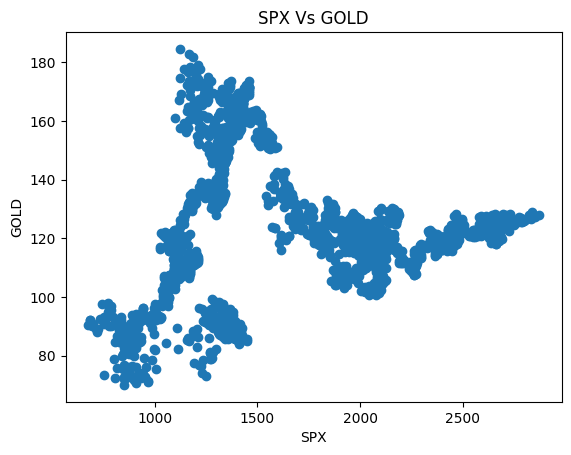

In [10]:
# Now we will visualize the dataset 
plt.scatter(gold_data.SPX , gold_data.GLD)
plt.xlabel("SPX")
plt.ylabel("GOLD")
plt.title("SPX Vs GOLD")
plt.show()

In [11]:
# From the above graph we can see the directly relationship between SPX and GOLD price mean when SPX increases GOLD increased and visa-versa

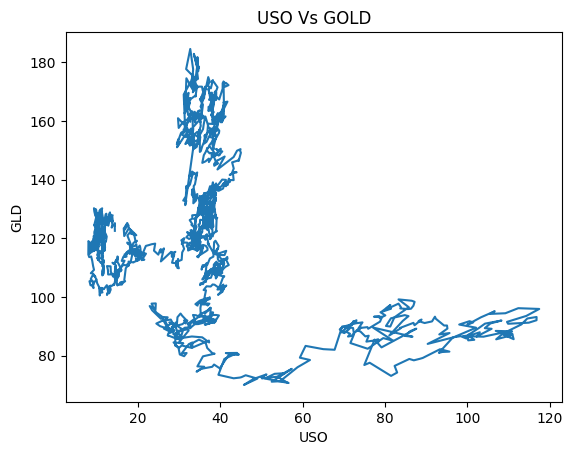

In [12]:
plt.plot(gold_data.USO , gold_data.GLD , linestyle='solid')
plt.xlabel("USO")
plt.ylabel("GLD")
plt.title("USO Vs GOLD")
plt.show()

In [13]:
# From the above graph we can see the inversely relationship between USO and GLD

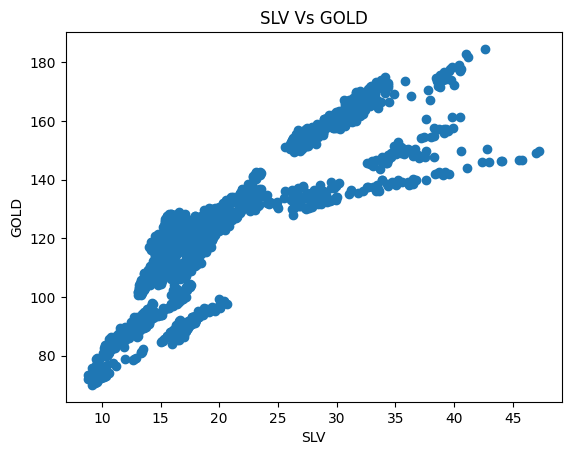

In [14]:
plt.scatter(gold_data.SLV , gold_data.GLD)
plt.xlabel("SLV")
plt.ylabel("GOLD")
plt.title("SLV Vs GOLD")
plt.show()

In [15]:
# As we can see SLV and GLD are prefectly positive correlated 

In [16]:
# Splitting the feature and target variable

In [17]:
X=gold_data[['SPX' , 'USO' , 'SLV' ,'EUR/USD']]
Y=gold_data['GLD']

In [18]:
# Now split the data into training and test data

X_train , X_test , Y_train , Y_test = train_test_split(X , Y ,test_size=0.2 , random_state=2)

In [19]:
# Checking the the actual no of data in the original dataset and train_test dataset
print("No.of rows in Original Dataset : " , gold_data.shape)
print("No.of rows in Training dataset (Only Feature): " , X_train.shape)
print("No.of rows in Train dataset (Only Target): " , Y_train.shape)
print("No.of rows in Test dataset (Only Feature): " , X_test.shape)
print("No.of rows in Test dataset (Only Target): " , Y_test.shape)

No.of rows in Original Dataset :  (2290, 6)
No.of rows in Training dataset (Only Feature):  (1832, 4)
No.of rows in Train dataset (Only Target):  (1832,)
No.of rows in Test dataset (Only Feature):  (458, 4)
No.of rows in Test dataset (Only Target):  (458,)


In [20]:
# Now we will build the model
linear_regression=LinearRegression()

In [21]:
# Fitting the  feature training data and target training data so that our model can learn from it 
linear_regression.fit(X_train , Y_train)

LinearRegression()

In [22]:
# After or model learns from the training data we will test our model by providing the test data
prediction=linear_regression.predict(X_test)

In [23]:
print("Values Predicted by the model : " , prediction)

Values Predicted by the model :  [159.45290968  81.50858067 113.4868037  128.55153817 126.20403783
 141.31818338 165.49416492 124.44197659 113.95389904 122.9965895
 113.95492464 174.89529849 132.66890174 159.24793304 118.8791679
 122.14315717 150.37153054 161.27175405 152.2792036  162.19946709
 145.88372183 118.07669395 180.21729122 178.13331554 123.51701986
  98.82914322  76.63486248 119.38435511 113.85027665 159.25706609
  93.76037617 120.05334649  88.61086583 114.28801659 112.77954274
 144.19518102 118.78252489 115.87334354 144.06409553 113.81864246
 100.49676727  89.42842238 120.36720699 110.47635305 146.4894628
 119.30321261 110.99311348 111.3386287   96.48139076 123.40842816
  79.51413425 115.36111603 121.78896764 114.55367722 120.9074622
 117.10612464 152.31198525 182.7735091  196.73570503  91.06670951
 101.92097594  87.48443506  94.33158785 119.17357764 121.8935122
 125.85678089 163.2699701  122.91100556 113.55098736 104.06905043
 155.16775229 176.87972077 125.62460858 113.8589

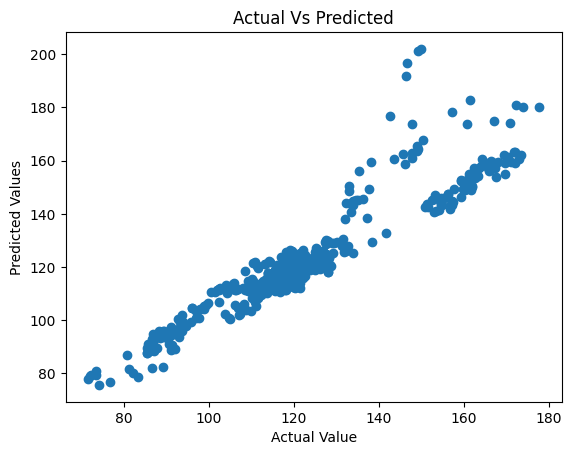

In [24]:
# Visualizing the linear Regression Graph between predicted values and Actual Values Scatter plots
plt.scatter(Y_test , prediction)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Values")
plt.title("Actual Vs Predicted")
plt.show()

In [25]:
# Now we will find the residual error = Actual value - Predicted Value 
residual = Y_test - prediction 
print("Residual Error is : ",residual)

Residual Error is :  903      8.567094
129     -0.278578
1787    -1.166804
1913    -0.961542
2048    -6.584035
          ...    
923      6.513613
1693    -4.860453
2054    -4.214210
658    -11.105053
376     -4.588383
Name: GLD, Length: 458, dtype: float64


Text(0.5, 1.0, 'Distribution Graph of Residual Errors')

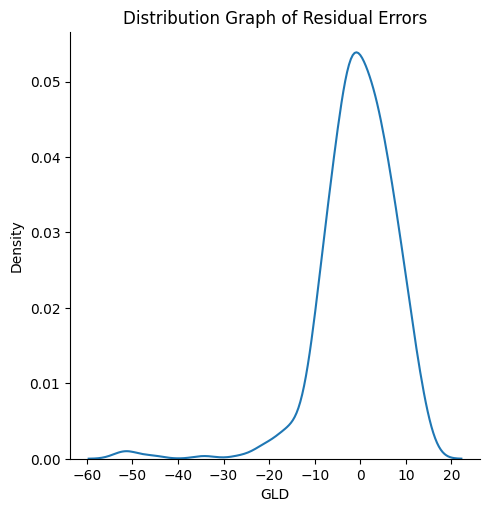

In [26]:
# Plotting the residual
sns.displot(residual , kind='kde')
plt.title("Distribution Graph of Residual Errors")

In [27]:
# As we can see the outliers are there in the left-hand side so we can say that for higher value our model is give right ans but not for lower value

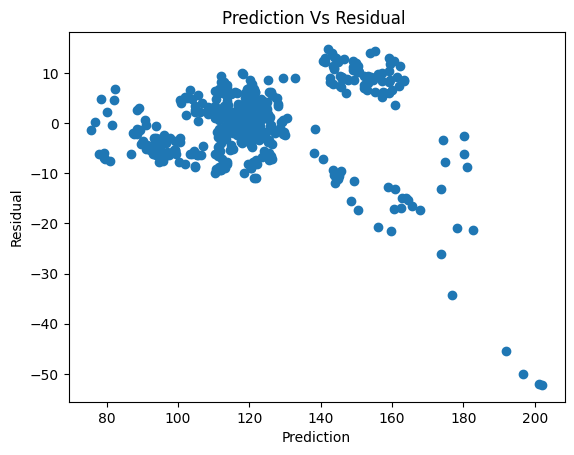

In [28]:
# plotting the residual vs Prediction
plt.scatter(prediction , residual)
plt.xlabel("Prediction")
plt.ylabel("Residual")
plt.title("Prediction Vs Residual ")
plt.show()

In [29]:
# Now we will evaluate the model using performance metrics
MSE=mean_squared_error(Y_test , prediction)
print("Means Squared Error : " , MSE)

Means Squared Error :  70.7889007972153


In [30]:
MAE = mean_absolute_error(Y_test , prediction)
print("Mean Absolute Error :" , MAE)

Mean Absolute Error : 5.911486735777762


In [31]:
RMSE=np.sqrt(MSE)
print("Root Mean Squared Error :",RMSE)

Root Mean Squared Error : 8.413614015226472


In [34]:
# Now we will pickle the linear Regression model
loaded_model=pickle.dump(linear_regression , open('regmodel' , 'wb'))




In [42]:
loaded_model=pickle.load(open('regmodel' , 'rb'))
input_data=(2671.919922,14.0600,15.5100,1.186789)
# Changing the input array as numpy array 
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=loaded_model.predict(input_data_reshaped)
print(prediction)

[120.6873631]


D:\Software\Anaconda\envs\MachineLearning\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [43]:
# Now we will use second model to predict the gold price and see the which one is giving close value 

In [44]:
Random_Forest_Model=RandomForestRegressor()

In [45]:
Random_Forest_Model.fit(X_train , Y_train)

RandomForestRegressor()

In [46]:
RFR_prediction=Random_Forest_Model.predict(X_test)

In [47]:
print("Predicted values using Random Forest Regressor : " , RFR_prediction)

Predicted values using Random Forest Regressor :  [168.70159989  81.87579992 115.96440015 127.68860048 120.67370117
 154.88709773 150.19489789 126.03690032 117.56169865 125.86890104
 116.87080092 171.42350072 141.67239827 166.95859831 115.27290006
 117.43380045 139.11160355 170.2373011  159.1383023  158.77699939
 155.16680032 125.24809998 175.50989953 156.95180286 125.11750059
  93.95519962  76.71640015 120.82089982 119.09409949 167.52349927
  88.15980063 125.28080027  91.2415006  117.75970031 121.04449895
 137.22000079 115.55190123 114.96650067 146.57169903 107.16330109
 104.61220258  87.1347978  126.45080034 118.10859994 154.20169969
 119.60800022 108.34620022 107.93499829  93.09570046 127.16209762
  75.53210038 113.65629933 121.37409964 111.2463991  118.94469887
 120.96199989 159.38550005 167.8748001  147.11699657  85.88749909
  94.35970044  86.72699921  90.59579982 119.08070068 126.44910087
 127.4353003  169.79910054 122.31459955 117.69209889  98.6905001
 167.46130026 143.59399891 

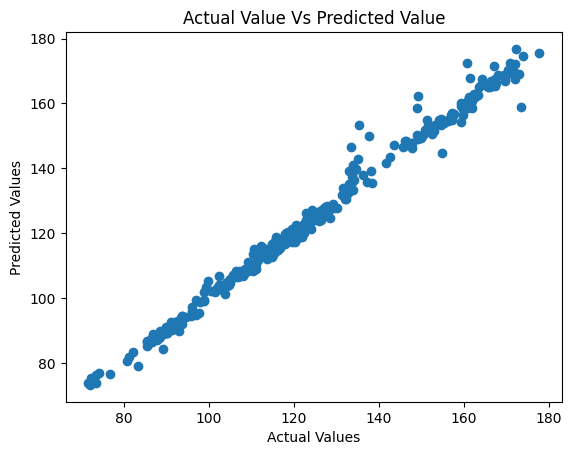

In [48]:
# Visualizing the predicted and Actual Values 
plt.scatter(Y_test , RFR_prediction)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Value Vs Predicted Value")
plt.show()

In [49]:
# Now we will find the residual error = Actual value - Predicted Value 
residual = Y_test - RFR_prediction 
print("Residual Error is : ",residual)

Residual Error is :  903    -0.681596
129    -0.645797
1787   -3.644400
1913   -0.098604
2048   -1.053698
          ...   
923    -0.630594
1693   -1.859202
2054    0.725599
658    -5.042199
376    -4.422398
Name: GLD, Length: 458, dtype: float64


Text(0.5, 1.0, 'Distribution Graph of Residual Errors')

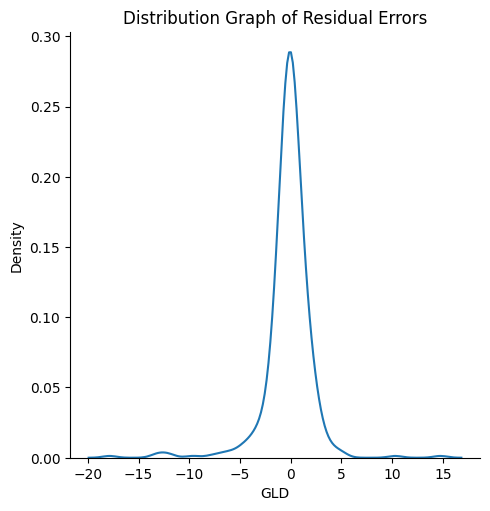

In [50]:
# Plotting the residual
sns.displot(residual , kind='kde')
plt.title("Distribution Graph of Residual Errors")

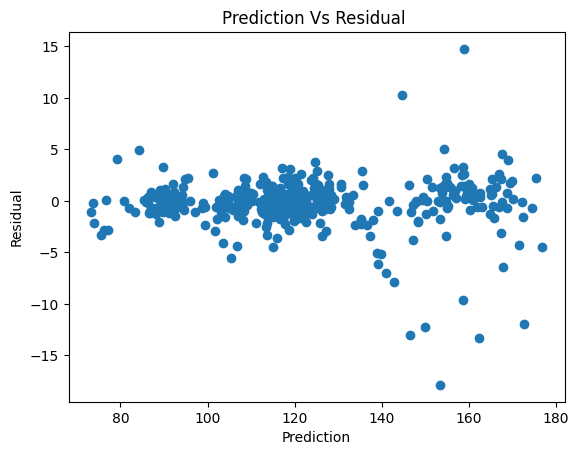

In [51]:
# plotting the residual vs Prediction
plt.scatter(RFR_prediction , residual)
plt.xlabel("Prediction")
plt.ylabel("Residual")
plt.title("Prediction Vs Residual ")
plt.show()

In [52]:
# Now we will evaluate the model using performance metrics
MSE=mean_squared_error(Y_test , RFR_prediction)
print("Means Squared Error : " , MSE)

Means Squared Error :  5.527930047200984


In [53]:
MAE=mean_absolute_error(Y_test , RFR_prediction)
print("Mean Absolute Error is : " , MAE)

Mean Absolute Error is :  1.3172715582751056


In [54]:
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error is : " , RMSE)

Root Mean Squared Error is :  2.3511550453343104


In [55]:
# Now we will pickle the linear Regression model
pickle.dump(Random_Forest_Model , open('Random_Forest.pkl' , 'wb'))

In [59]:
loaded_model=pickle.load(open('Random_Forest.pkl' , 'rb'))
input_data=(2671.919922,14.0600,15.5100,1.186789)
# Changing the input array as numpy array 
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=loaded_model.predict(input_data_reshaped)
print(prediction)

[123.97829685]


D:\Software\Anaconda\envs\MachineLearning\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [60]:
# As we can see that 
# MSE of linear Regression = 70.8 
# MSE of Random Forest Regressor = 5.5

# From the above we conclude that Random Forest will give better result for predicting gold price   